### Money change again
Compute the minimum number of coins needed to change the given
value into coins with denominations 1, 3, and 4.
* Input: An integer money.
* Output: The minimum number of coins with denominations 1, 3, and 4 that changes money.

In [1]:
def MinCoins(amount, coins):
	dp_array = [amount + 1] * (amount + 1) # setting up DP array
	dp_array[0] = 0
	for a in range(1, amount + 1):
		for c in coins:
			if a - c >= 0:
				dp_array[a] = min(dp_array[a], 1 + dp_array[a-c])
	return dp_array[amount] if dp_array[amount] != amount + 1 else -1

To get i = 5 we can get there in multiple ways 

from 4 → min_ops[4] + 1 = 2 + 1 = 3

from 2 → min_ops[2] + 1 + 1 = 1 + 2 = 3

from 3 → min_ops[3] + 1 + 1 = 1 + 2 = 3

for i = 6 we can also get there in multiple ways 

from 5 → min_ops[5] + 1 = 3 + 1 = 4

from 3 (*2) → min_ops[3] + 1 = 1 + 1 = 2

from 2 (*3) → min_ops[2] + 1 = 1 + 1 = 2

The pattern here is if i is divisble by 2 then typically multiplying by 2 is correct or of divisible by 3 then that is typically correct. 

In [40]:
def minimum_operations(n):

    min_ops = [0] * (n+1)

    if n <= 1:
        return 0

    for i in range(2, n + 1):

        if i % 3 == 0:
            min_ops[i] = round(i ** (1/3))
        if i % 2 == 0:
            min_ops[i] = round(math.sqrt(i))
        else:
            min_ops[i] = min_ops[i-1] + 1

    return min_ops[n]
    

### Edit Distance

Compute the edit distance between two strings.
* Input: Two strings.
* Output: The minimum number of single-symbol insertions,
deletions, and substitutions to transform one string into the
other one.

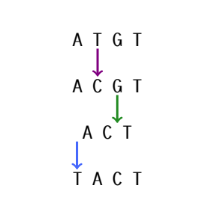


The edit distance problem is one that measures the distance between two strings by measuring the extend to which they can be *aligned* or matched up. Alignment is essentially writing the two strings above eachother. As shown here. 

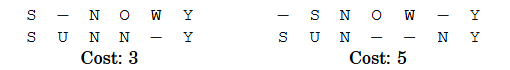

The alignment here with cost of three corresponds to inserting U, substituting N for O and deleting W. We turn to DP in order to find the best alignment since going through all of the solutions brute-force is very inefficient.

**What are the subproblems?**

One consideration is to look at the substring of each string E(i,j), where our final goal is to compute E(m,n). For example the alignment between x[1..i] and y[1..j] can be one of three things. 

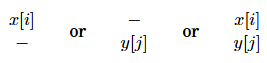

The first case costs 1 and inserts one on y[j-1] and we then need to still align x

In [ ]:
def edit_distance(s1, s2):
    '''
    Compute the edit distance between two strings.
    The edit distance is the minimum number of operations required
    to transform one string into the other. The allowed operations
    are insertion, deletion, and substitution of characters.
    '''
    n = len(s1)
    m = len(s2)
    dp = [[0] * (m + 1) for _ in range(n + 1)]
    
    for i in range(n+1):
        dp[i][0] = i

    for j in range(m+1):
        dp[0][j] = j
    
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if s1[i-1] == s2[j-1]:
                dp[i][j] = dp[i-1][j-1]
            else:
                dp[i][j] = 1 + min(
                    dp[i-1][j], # deletion
                    dp[i][j-1], # insertion
                    dp[i-1][j-1] #substitution
                )
    return dp[n][m]


  

## longest common subsequence
Compute the maximum length of a common subsequence of two
sequences.
* Input: Two sequences.
* Output: The maximum length of a common subsequence.

In [1]:
def longest_common_subsequence(s1, s2):

    dp = [[0 for j in range(len(s2) + 1)] for i in range(len(s1) + 1)] # creating 2D grid of dimensions

    for i in range(len(s1) - 1, -1, -1):
        for j in range(len(s2) - 1, -1, -1):
            if s1[i] == s2[j]:
                dp[i][j] = 1 + dp[i + 1][j + 1] # first subproblem
            else:
                dp[i][j] = max(dp[i][j +1], dp[i + 1][j]) # second subproblem

    return dp[0][0] 

## longest common subsequence of three subsequences
Compute the maximum length of a common subsequence of three
sequences.
* Input: Three sequences.
* Output: The maximum length of a common subsequence.

In [22]:
def longest_common_three_subsequence(s1, s2,s3):

    dp = [[[0 for _ in range(len(s3) + 1)] 
              for _ in range(len(s2) + 1)] 
              for _ in range(len(s1) + 1)] # creating 2D grid of dimensions
    
    for i in range(len(s1) - 1, -1, -1):
        for j in range(len(s2) - 1, -1, -1):
            for k in range(len(s3) -1, -1, -1):
                if s1[i] == s2[j] == s3[k]:
                    dp[i][j][k] = 1 + dp[i + 1][j + 1][k + 1] # first subproblem
                else:
                    dp[i][j][k] = max(dp[i][j][k +1], dp[i][j+1][k], dp[i+1][j][k]) # second subproblem

    return dp[0][0][0] 